# **Zeroth-Order Optimization (ZOO) Attack and Binary Input Detector Using MNIST-10**

### **Zero-Order Optimization (ZOO) Attack - Overview**

The Zero-Order Optimization (ZOO) attack is a black-box adversarial attack introduced by Athalye, Carlini, and Wagner in 2018. This attack targets scenarios where the attacker has no access to the model's gradients or any internal information (such as architecture or weights). In contrast to attacks like FGSM or PGD, which rely on gradient information, ZOO uses zero-order optimization to generate adversarial examples by querying the model and using the output (e.g., class probabilities) to estimate gradients indirectly.

#### **Key Concepts**

**1. Black-box Attack**: The attacker only has access to the model’s outputs (e.g., logits or probabilities) for different inputs, without any access to the model's parameters, gradients, or internal structure.

**2. Zero-Order Optimization**: Instead of computing gradients directly, ZOO estimates the gradient using finite differences based on model queries. This is a numerical method where the gradient is approximated by observing how small changes to the input affect the output.

**3. Adversarial Example**: A perturbation of the input that is designed to make the model misclassify the input while keeping the perturbation imperceptible to humans.

#### **How Zero-Order Optimization (ZOO) Works**

The ZOO attack formulates the generation of adversarial examples as an optimization problem. The main goal is to find an input perturbation $δ$ that minimizes the loss or maximizes the misclassification score. This perturbation is computed using an optimization procedure, where the gradients are approximated using finite differences, i.e., by querying the model multiple times with perturbed inputs.
The ZOO Attack Formulation

#### **The ZOO attack optimizes the following objective function:**
$$L(x_{adv},x)=E[Loss(f(x_{adv}),y)]+λ⋅∥x_{adv}−x∥_{p}$$

Where:

* $x_{adv}$​ is the adversarial example.
* $x$ is the original input.
* $f(x_{adv})$ is the model's output for the adversarial input $x_{adv}$​.
* $y$ is the true label of the original input $x$.
* $λ$ is a regularization parameter that controls the trade-off between adversarial effectiveness and perturbation magnitude.
* $∥x_{adv}−x∥_{p}$​ is the perturbation magnitude, typically measured using the p-norm (e.g., $p=2$ for Euclidean distance).

The attack attempts to perturb $x$ to minimize this objective function, thus ensuring that the adversarial example $x_{adv}$​ causes the model to misclassify while maintaining a small perturbation.

#### **Step 1: Finite Difference Gradient Estimation**

Since we do not have direct access to the gradients of the model, we use finite differences to estimate the gradient. This involves querying the model multiple times with small perturbations and measuring how the outputs change in response.

For an input $x$ and a perturbation vector $δ$, the gradient estimate for a particular dimension $i$ of the input is given by:

$$\hat{∇}_{i}​=\frac{f(x + \epsilon e_i) - f(x - \epsilon e_i)}{2\epsilon}​$$

Where:

* $\hat{∇}_{i}$​ is the estimate of the gradient in the i-th direction.
* $f(x)$ is the model's output (e.g., class probability or logits) for the input $x$.
* $ϵ$ is a small perturbation (step size), and $e_{i}$​ is the unit vector along the $i$-th dimension of the input.
* The term $f(x+ϵei)$ represents the output of the model when the input $x$ is perturbed positively along the $i$-th axis by $ϵ$.
* The term $f(x−ϵei)$ represents the output of the model when the input $x$ is perturbed negatively along the $i$-th axis by $ϵ$.

#### **Step 2: Optimization Procedure**

Using these estimated gradients, the attack proceeds to optimize the perturbation $δ$ iteratively. The objective function for the optimization can be written as:
$$L(δ)=E[Loss(f(x+δ),y)]+λ⋅∥δ∥_{p}$$


Where:

* $δ$ is the perturbation that is being optimized.
* $f(x+δ)$ is the model’s output for the perturbed input $x+δ$.
* $λ$ controls the trade-off between minimizing the loss (misclassification) and minimizing the magnitude of the perturbation.
* The regularization term $∥δ∥_{p}$​ ensures that the perturbation is not too large and remains imperceptible to humans.

The optimization problem is solved using an iterative algorithm like L-BFGS or Adam, which adjusts $δ$ to minimize the objective function.

#### **Step 3: Querying and Perturbing the Input**

For each iteration, the following steps are performed:

**1. Perturb** the input $x$ by a small amount $δ$.

**2. Query the model** with the perturbed inputs $x+δ$ and $x−δ$.

**3. Estimate the gradient** using the finite difference method.

**4. Update the perturbation** $δ$ based on the gradient information to reduce the misclassification loss while controlling the perturbation size.

#### **Step 4: Generating the Adversarial Example**

The attack continues until the optimization converges, i.e., until the adversarial example $x_{adv}=x+δ$ successfully misclassifies the model or the perturbation reaches the desired magnitude.
Zero-Order Optimization (ZOO) Attack Process

**1. Initialize** the original input $x$ and true label $y$.

**2. Set the regularization parameter** $λ$ and perturbation size $ϵ$.

**3. Iterate** over the optimization procedure:
* Use finite differences to estimate the gradient for each dimension of the input.
* Update the perturbation $δ$ using an optimization algorithm (e.g., L-BFGS or Adam).

**4. Final adversarial example** $x_{adv}=x+δ$.

#### **Strengths and Weaknesses of ZOO**

**Strengths:**

* **Black-box Applicability**: ZOO is designed specifically for black-box attacks, where the attacker has no access to the model's internals (e.g., weights, gradients, architecture).
* **High Success Rate**: Despite being a black-box attack, ZOO is highly effective and can generate adversarial examples that successfully mislead the model.
* **Versatility**: ZOO can be applied to various models and tasks (e.g., classification, regression), as long as the attacker can query the model.

**Weaknesses:**

* **Query Intensive**: ZOO requires many queries to estimate the gradients, making it computationally expensive, especially for high-dimensional inputs such as images.
* **Slow Convergence**: The optimization may take time to converge, particularly when the perturbation space is large (e.g., for high-dimensional inputs such as images).
* **Dependence on Perturbation Size**: The success of ZOO heavily depends on the choice of $ϵ$ (perturbation size). A large ϵϵ might make the perturbation visible, while a small ϵϵ might not be sufficient to fool the model.

## **Implementation**

This notebook demonstrates the implementation of the Zoo attack using the Adversarial Robustness Toolbox (ART) against deep learning models trained on the MNIST-10 dataset. The tasks covered in this notebook are:

* Load the Required Libraries

* Load the Dataset and Inspect the Data

* Create a Deep Learning Model

* Train and Evaluate the Deep Learning Model on MNIST Test Data

* Implement ZOO Attack Using ART

* Create Adversarial Samples Using the Z00 Attack

* Evaluate the Deep Learning Model Against the Adversarial Samples

* Create a Detector Model to Detect Adversarial Samples

* Train and Evaluate the Detector Model

## Import and install required libaries

In [ ]:
# Install the Adversarial Robustness Toolbox for creating and evaluating adversarial attacks.
!pip install adversarial-robustness-toolbox

# Install VisualKeras for visualizing model architecture with layer types and connections.
!pip install visualkeras

In [14]:
# Suppress warnings to keep the notebook output clean.
import warnings
warnings.filterwarnings('ignore')

# Import TensorFlow and disable eager execution for compatibility with some ART components.
import tensorflow as tf
# tf.compat.v1.disable_eager_execution()

# Import numerical and visualization libraries.
import numpy as np
from matplotlib import pyplot as plt

# Import ART (Adversarial Robustness Toolbox) modules:
# - KerasClassifier wraps Keras models for ART compatibility.
# - ZooAttack is an evasion attack method.
# - BinaryInputDetector is used to detect adversarial inputs.
from art.estimators.classification import KerasClassifier
from art.attacks.evasion import ZooAttack
from art.defences.detector.evasion import BinaryInputDetector

In [2]:
# Set only GPU:1 to be visible (index starts at 0)
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        # Restrict TensorFlow to only use the second GPU
        tf.config.set_visible_devices(gpus[1], 'GPU')

        # Optionally, set memory growth to avoid pre-allocating the entire GPU
        tf.config.experimental.set_memory_growth(gpus[1], True)

        logical_gpus = tf.config.list_logical_devices('GPU')
        print(f"{len(gpus)} Physical GPUs, {len(logical_gpus)} Logical GPU(s) being used.")
    except RuntimeError as e:
        print(e)

3 Physical GPUs, 1 Logical GPU(s) being used.


I0000 00:00:1756157064.457744  180752 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22477 MB memory:  -> device: 1, name: Quadro RTX 6000, pci bus id: 0000:17:00.0, compute capability: 7.5


### Load MNIST dataset

In [3]:
# Load MNIST dataset from TensorFlow's built-in datasets.
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values to the range [0, 1].
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Get minimum and maximum pixel values (should be 0.0 and 1.0 after normalization).
min_val = x_train.min()
max_val = x_train.max()

# Output dataset shapes and value range for verification.
x_train.shape, y_train.shape, x_test.shape, y_test.shape, min_val, max_val

((60000, 28, 28),
 (60000,),
 (10000, 28, 28),
 (10000,),
 np.float32(0.0),
 np.float32(1.0))



Have a look at the data!


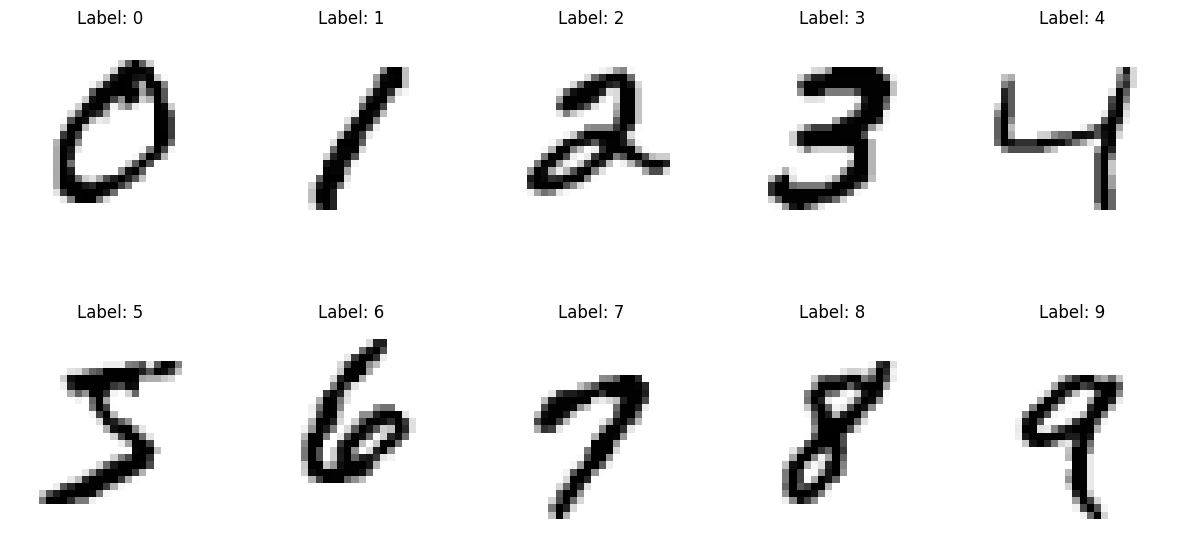

In [4]:
# Plot 10 sample images from the training set with their corresponding labels.
fig, ax = plt.subplots(2, 5, figsize=(15, 7))
ax = ax.flatten()

# Display one example image for each digit label from 0 to 9.
for i in range(10):
    # Get the first image corresponding to label i
    img_idx = np.argwhere(y_train == i)[0][0]
    ax[i].imshow(x_train[img_idx], cmap='gray_r')
    ax[i].set_title(f"Label: {i}", fontsize=12)
    ax[i].axis('off')

### Reshape and one-hot encode the data

In [5]:
# Number of output classes (digits 0 through 9).
nb_classes = 10

# One-hot encode the labels for training and testing sets.
y_train = tf.keras.utils.to_categorical(y_train, num_classes=nb_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=nb_classes)

# Expand image dimensions to add a channel axis (from [28, 28] to [28, 28, 1]).
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

## **Model Training**

#### **Model Description**

This convolutional neural network (CNN) is designed for image classification tasks. It consists of several layers that progressively extract features from the input images and classify them into one of 10 categories.

1. Input Layer: The model accepts input images of shape (28, 28, 1).
2. Convolutional Layers:
    * First Conv Layer: 32 filters of size (3x3), activated by ReLU, followed by max pooling (2x2).
    * Second Conv Layer: 64 filters of size (3x3), activated by ReLU, followed by max pooling (2x2).
    * Third Conv Layer: 128 filters of size (3x3), activated by ReLU, followed by max pooling (2x2).
3. Flatten Layer: Converts the 2D feature maps to a 1D feature vector.
4. Dense Layer: Fully connected layer with 128 neurons, activated by ReLU, and includes a dropout of 20% to prevent overfitting.
5. Output Layer: 10 neurons with softmax activation to classify the input image into one of the 10 categories.

The model is compiled with the Adam optimizer and uses categorical cross-entropy loss, with accuracy as the performance metric.

In [7]:
# Define a sequential Convolutional Neural Network (CNN) model.
model = tf.keras.models.Sequential([
    # First convolutional block: Conv → ReLU → MaxPooling
    # tf.keras.layers.InputLayer(input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # Second convolutional block
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', strides=1),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),

    # Third convolutional block
    tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu', strides=1),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),

    # Flatten the output to feed into dense layers
    tf.keras.layers.Flatten(),

    # Fully connected dense layer
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),  # Dropout for regularization

    # Output layer with softmax activation for multi-class classification
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model with Adam optimizer and categorical crossentropy loss
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

### Model Summary

In [8]:
# Print a detailed summary of the model architecture,
# including layer types, output shapes, and number of parameters.
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,578 (396.79 KB)

 Trainable params: 101,578 (396.79 KB)

 Non-trainable params: 0 (0.00 B)

### Visualize the CNN Architecture

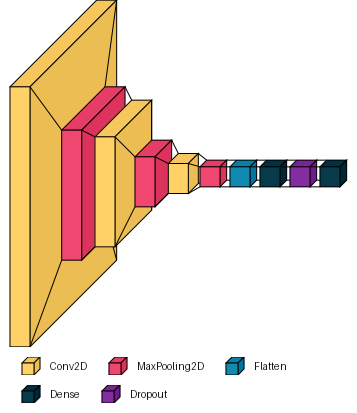

In [9]:
import visualkeras
# Display a layered visual representation of the model architecture.
# 'scale_xy' controls the scaling of the diagram.
# 'legend=True' shows layer types with corresponding color codes.
visualkeras.layered_view(model, scale_xy=10, legend=True)

### Visualize Model Architecture Diagram

In [10]:
# Generate and display a plot of the model architecture,
# showing each layer’s name and output shape.
# tf.keras.utils.plot_model(model, show_shapes=True, dpi = 75)

### Fit the model on training data.

In [ ]:
# Train the model on the training data for 3 epochs.
# The history object stores training metrics and loss values.
# history = model.fit(x_train, y_train, epochs=10, batch_size=128)

2025-01-14 15:47:43.913932: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 618 MB memory:  -> device: 2, name: Quadro RTX 8000, pci bus id: 0000:73:00.0, compute capability: 7.5
2025-01-14 15:47:44.055611: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:357] MLIR V1 optimization pass is not enabled
2025-01-14 15:47:44.178675: W tensorflow/c/c_api.cc:291] Operation '{name:'dense_1_1/kernel/Assign' id:338 op device:{requested: '', assigned: ''} def:{{{node dense_1_1/kernel/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](dense_1_1/kernel, dense_1_1/kernel/Initializer/stateless_random_uniform)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2025-01-14 15:47:44.516238: W tensorflow/c/c_ap

## Load or Save the Trained Model

In [11]:
# If you have trained your own model and want to save it, uncomment and run:
model_path = './mnist10_model.keras'
# model.save(model_path)

# Otherwise, load the pretrained model provided (e.g., from Google Drive or HuggingFace).
!wget https://raw.githubusercontent.com/mnazari123/SecAI_Workshop_Data/main/Models/mnist10_model.keras
model = tf.keras.models.load_model(model_path)

# Display the model architecture summary to make sure the model has successfully been loaded.
model.summary()

--2025-08-25 16:24:55--  https://raw.githubusercontent.com/mnazari123/SecAI_Workshop_Data/main/Models/mnist10_model.keras
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1266398 (1.2M) [application/octet-stream]
Saving to: ‘mnist10_model.keras.5’

mnist10_model.keras 100%[===================>]   1.21M  --.-KB/s    in 0.1s    

2025-08-25 16:24:55 (11.2 MB/s) - ‘mnist10_model.keras.5’ saved [1266398/1266398]



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 304,736 (1.16 MB)

 Trainable params: 101,578 (396.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 203,158 (793.59 KB)

### Evaluate Model Performance on Test Data

In [12]:
# Evaluate the model on the test dataset and get loss and accuracy.
loss_test, accuracy_test = model.evaluate(x_test, y_test)

# Print the test accuracy as a percentage.
print('Accuracy on test data: {:4.2f}%'.format(accuracy_test * 100))

I0000 00:00:1756157101.815625  181163 service.cc:148] XLA service 0x7dd6d8005840 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1756157101.815650  181163 service.cc:156]   StreamExecutor device (0): Quadro RTX 6000, Compute Capability 7.5
2025-08-25 16:25:01.829732: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1756157101.862177  181163 cuda_dnn.cc:529] Loaded cuDNN version 91200
2025-08-25 16:25:02.075606: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[32,32,26,26]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,1,28,28]{3,2,1,0}, f32[32,1,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode

107/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9853 - loss: 0.0745 

I0000 00:00:1756157102.424511  181163 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


298/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9867 - loss: 0.0717

2025-08-25 16:25:02.915466: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[16,32,26,26]{3,2,1,0}, u8[0]{0}) custom-call(f32[16,1,28,28]{3,2,1,0}, f32[32,1,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-08-25 16:25:02.925461: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[16,64,11,11]{3,2,1,0}, u8[0]{0}) custom-call(f32[16,32,13,13]{3,2,1,0}, f32[64,32,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config=

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9896 - loss: 0.0567
Accuracy on test data: 98.96%


### Wrap the Keras Model with an ART Classifier

In [13]:
# Create an ART KerasClassifier to enable adversarial robustness tools.
# 'clip_values' defines the input data range for normalization and attack generation.
classifier = KerasClassifier(model=model, clip_values=(min_val, max_val))

# **Zeroth-Order Optimization (ZOO) Attack**

## Overview

> class art.attacks.evasion.ZooAttack(classifier: CLASSIFIER_TYPE, confidence: float = 0.0, targeted: bool = False, learning_rate: float = 0.01, max_iter: int = 10, binary_search_steps: int = 1, initial_const: float = 0.001, abort_early: bool = True, use_resize: bool = True, use_importance: bool = True, nb_parallel: int = 128, batch_size: int = 1, variable_h: float = 0.0001, verbose: bool = True)

The black-box zeroth-order optimization attack from Pin-Yu Chen et al. (2018). This attack is a variant of the C&W attack which uses ADAM coordinate descent to perform numerical estimation of gradients.
* Paper link: https://arxiv.org/abs/1708.03999

*__init__(classifier: CLASSIFIER_TYPE, confidence: float = 0.0, targeted: bool = False, learning_rate: float = 0.01, max_iter: int = 10, binary_search_steps: int = 1, initial_const: float = 0.001, abort_early: bool = True, use_resize: bool = True, use_importance: bool = True, nb_parallel: int = 128, batch_size: int = 1, variable_h: float = 0.0001, verbose: bool = True)*

**Create a ZOO attack instance.**

**Parameters**

* classifier – A trained classifier.
* confidence (float) – Confidence of adversarial examples: a higher value produces examples that are farther away, from the original input, but classified with higher confidence as the target class.
* targeted (bool) – Should the attack target one specific class.
* learning_rate (float) – The initial learning rate for the attack algorithm. Smaller values produce better results but are slower to converge.
* max_iter (int) – The maximum number of iterations.
* binary_search_steps (int) – Number of times to adjust constant with binary search (positive value).
* initial_const (float) – The initial trade-off constant c to use to tune the relative importance of distance and confidence. If binary_search_steps is large, the initial constant is not important, as discussed in Carlini and Wagner (2016).
* abort_early (bool) – True if gradient descent should be abandoned when it gets stuck.
* use_resize (bool) – True if to use the resizing strategy from the paper: first, compute attack on inputs resized to 32x32, then increase size if needed to 64x64, followed by 128x128.
* use_importance (bool) – True if to use importance sampling when choosing coordinates to update.
* nb_parallel (int) – Number of coordinate updates to run in parallel. A higher value for nb_parallel should be preferred over a large batch size.
* batch_size (int) – Internal size of batches on which adversarial samples are generated. Small batch sizes are encouraged for ZOO, as the algorithm already runs nb_parallel coordinate updates in parallel for each sample. The batch size is a multiplier of nb_parallel in terms of memory consumption.
* variable_h (float) – Step size for numerical estimation of derivatives.
* verbose (bool) – Show progress bars.

> generate(x: ndarray, y: Optional[ndarray] = None, **kwargs) → ndarray

**Generate adversarial samples and return them in an array.**

**Return type**
* ndarray

**Parameters**
* x (ndarray) – An array with the original inputs to be attacked.
* y – Target values (class labels) one-hot-encoded of shape (nb_samples, nb_classes) or indices of shape (nb_samples,).

**Returns**
* An array holding the adversarial examples.

**Link**
documetation: https://adversarial-robustness-toolbox.readthedocs.io/en/latest/modules/attacks/evasion.html#zeroth-order-optimization-zoo-attack
github: https://github.com/Trusted-AI/adversarial-robustness-toolbox/blob/main/art/attacks/evasion/zoo.py

### Create an ART ZOO attack.

In [15]:
attack_zoo = ZooAttack(classifier = classifier,
                       learning_rate=1.0,
                       targeted = False,
                       max_iter = 500,
                       verbose = True,
                       batch_size=32,
                       nb_parallel=32)

## Generate adversarial test data.

In [ ]:
# Reduce test set size to 500 samples for faster adversarial generation and evaluation.
# It took around 183 minutes to generate 500 samples. 
x_test = x_test[:500]
y_test = y_test[:500]

# Generate adversarial examples from the reduced test set using the ZOO attack.
x_test_adv = attack_zoo.generate(x_test, y=y_test)

ZOO: 100%|██████████| 16/16 [3:03:42<00:00, 688.88s/it]   


## Save or Load ZOO-Generated Adversarial Test Data

In [17]:
# Option 1: Save your newly generated adversarial test data (uncomment to use).
zoo_data_path = 'zoo_poison_data_MNIST10_test_S500.npz'
np.savez(zoo_data_path,
         x_test_adv=x_test_adv, y_test_adv=y_test)

# Option 2: Load previously saved adversarial test data (recommended for reuse or quick experiments).
# Download the data file from GitHub raw URL
# !wget https://raw.githubusercontent.com/mnazari123/SecAI_Workshop_Data/main/data/pgd_poison_data_MNIST10_test_S500.npz

# x_test_data = np.load(pgd_data_path)
# x_test_adv, y_test = x_test_data['x_test_adv'], x_test_data['y_test_adv']
# x_test_adv.shape, y_test.shape

## Visualize Adversarial Examples and Their Predictions

2025-08-26 09:28:30.960260: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[1,32,26,26]{3,2,1,0}, u8[0]{0}) custom-call(f32[1,1,28,28]{3,2,1,0}, f32[32,1,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-08-26 09:28:30.975175: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[1,64,11,11]{3,2,1,0}, u8[0]{0}) custom-call(f32[1,32,13,13]{3,2,1,0}, f32[64,32,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cu

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


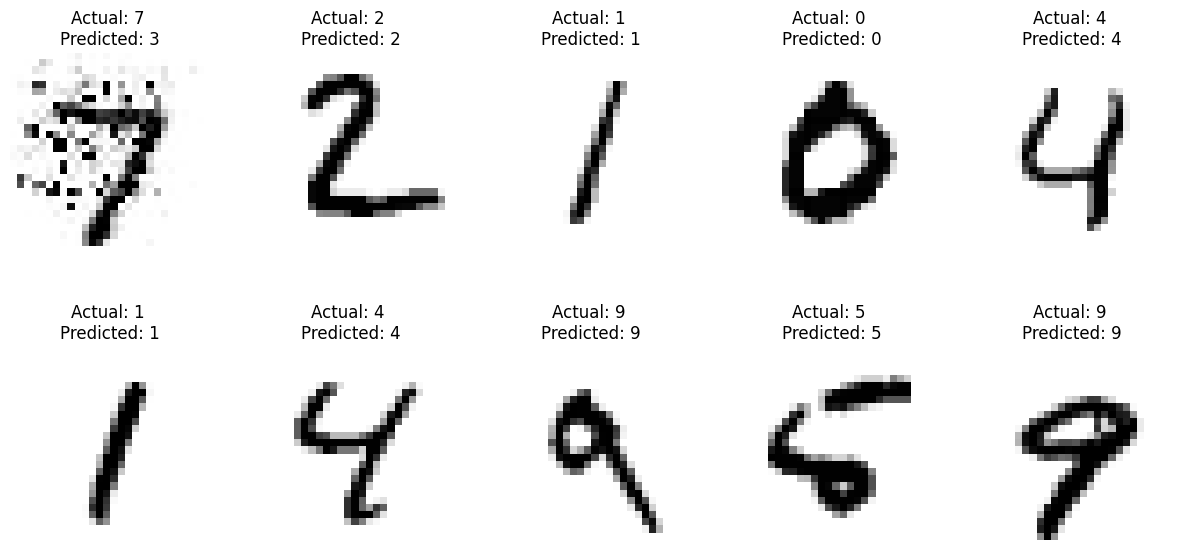

In [18]:
# Display the first 10 adversarial examples along with their actual and predicted labels.
fig, ax = plt.subplots(2, 5, figsize=(15, 7))
ax = ax.flatten()

for i, (image, label) in enumerate(zip(x_test_adv[:10], y_test[:10])):
    # Display the adversarial image.
    ax[i].imshow(image.squeeze(), cmap='gray_r')

    # Show actual and predicted labels.
    prediction = model.predict(np.expand_dims(image, axis=0)).argmax()
    ax[i].set_title(f"Actual: {label.argmax()} \nPredicted: {prediction}", fontsize=12)
    ax[i].axis('off')

## Evaluate the Model on Adversarial Test Data

In [19]:
# Evaluate model performance on adversarial examples.
loss_test, accuracy_test = model.evaluate(x_test_adv, y_test)

# Calculate the average perturbation introduced by the adversarial attack.
perturbation = np.mean(np.abs(x_test_adv - x_test))

# Print evaluation results.
print('Accuracy on adversarial test data: {:4.2f}%'.format(accuracy_test * 100))
print('Average perturbation: {:4.2f}'.format(perturbation))

 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9688 - loss: 0.0505

2025-08-26 09:28:45.055951: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[20,64,11,11]{3,2,1,0}, u8[0]{0}) custom-call(f32[20,32,13,13]{3,2,1,0}, f32[64,32,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-08-26 09:28:45.082293: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[20,128,3,3]{3,2,1,0}, u8[0]{0}) custom-call(f32[20,64,5,5]{3,2,1,0}, f32[128,64,3,3]{3,2,1,0}, f32[128]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9680 - loss: 0.0962
Accuracy on adversarial test data: 96.80%
Average perturbation: 0.00


# Prepare Training Data for Adversarial Sample Detector

In [20]:
# Generate new adversarial examples from a subset of the training data using PGD.
x_train_adv = attack_zoo.generate(x_train[:500])
nb_train = x_train[:500].shape[0]

# Combine clean and adversarial samples to create a binary classification dataset for detection.
x_train_detector = np.concatenate((x_train[:500], x_train_adv), axis=0)

# Create labels: [1, 0] for clean samples, [0, 1] for adversarial samples.
y_train_detector = np.concatenate((
    np.array([[1, 0]] * nb_train),  # Clean
    np.array([[0, 1]] * nb_train)   # Adversarial
), axis=0)

ZOO: 100%|██████████| 16/16 [44:42<00:00, 167.65s/it]


##Save or Load Adversarial Detector Training Data

In [21]:
# Option 1: Save generated clean and adversarial samples for training the detector.
np.savez('./zoo_poison_data_MNIST10_train_S1000.npz',
         x_train_detector=x_train_detector, y_train_detector=y_train_detector)

# Option 2: Load pre-saved detector training data to avoid regeneration.
# detector_data = np.load('./pgd_generated_data/pgd_detector_generated_MNIST10.npz')
# x_train_detector, y_train_detector = detector_data['x_train_detector'], detector_data['y_train_detector']

# Verify the shape of loaded or prepared data.
# x_train_detector.shape, y_train_detector.shape

## Build a similar CNN architecture model for detecting Adversarial Inputs

In [22]:
# Define a CNN model to detect adversarial vs. clean images (binary classification).
detector_model = tf.keras.models.Sequential([
    # First convolutional block
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # Second convolutional block
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', strides=1),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),

    # Third convolutional block
    tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu', strides=1),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),

    # Classification head
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2, activation='softmax')  # Two output classes: [clean, adversarial]
])

# Compile the detector model with Adam optimizer and categorical crossentropy loss.
detector_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

## Train the Adversarial Detector Model

In [23]:
# Train the adversarial detector model for 3 epochs.
# Since the goal is to distinguish between clean and adversarial inputs,
# a few epochs (e.g., 3) are typically sufficient to learn this binary classification task.
history = detector_model.fit(x_train_detector, y_train_detector, epochs=10)

Epoch 1/10


2025-08-26 10:27:43.526656: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[32,32,26,26]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,1,28,28]{3,2,1,0}, f32[32,1,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-08-26 10:27:43.542978: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[32,64,11,11]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,32,13,13]{3,2,1,0}, f32[64,32,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config=

28/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4782 - loss: 0.7014 

2025-08-26 10:27:44.905753: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[8,32,26,26]{3,2,1,0}, u8[0]{0}) custom-call(f32[8,1,28,28]{3,2,1,0}, f32[32,1,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-08-26 10:27:44.915057: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[8,64,11,11]{3,2,1,0}, u8[0]{0}) custom-call(f32[8,32,13,13]{3,2,1,0}, f32[64,32,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cu

32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.4750 - loss: 0.6997
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4650 - loss: 0.6954
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4890 - loss: 0.6938
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4630 - loss: 0.6935
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4880 - loss: 0.6935
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5070 - loss: 0.6933
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4980 - loss: 0.6935
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4960 - loss: 0.6932
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5100 - loss: 0.6947
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5010 - loss: 0.6932


In [24]:
# Define path to save/load the detector model
detector_model_path = './ZOO_detector_model_mnist10.keras'
detector_model.save(detector_model_path)

# Load the pre-trained detector model from the specified path
# detector_model = tf.keras.models.load_model(path)

# Display the model architecture to make sure the models has been loaded successfully.
detector_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 328,328 (1.25 MB)

 Trainable params: 109,442 (427.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 218,886 (855.03 KB)

## Prepare test samples for the detector model

In [27]:
# Get the number of original test samples
nb_test = x_test.shape[0]

# Combine clean and adversarial test images into one array
x_test_detector = np.concatenate((x_test, x_test_adv), axis=0)

# Create corresponding labels: [1, 0] for clean, [0, 1] for adversarial
y_test_detector = np.concatenate((np.array([[1, 0]] * nb_test),
                                  np.array([[0, 1]] * nb_test)), axis=0)

### Evaluat the result

In [28]:
# --- Evaluate the detector model on combined test data ---

# Evaluate the model's performance on clean + adversarial samples
loss_test, accuracy_test = detector_model.evaluate(x_test_detector, y_test_detector)

# Print the accuracy as a percentage
print('Accuracy on test data: {:4.2f}%'.format(accuracy_test * 100))

 1/32 ━━━━━━━━━━━━━━━━━━━━ 11s 384ms/step - accuracy: 1.0000 - loss: 0.6808

2025-08-26 10:31:00.338171: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[8,32,26,26]{3,2,1,0}, u8[0]{0}) custom-call(f32[8,1,28,28]{3,2,1,0}, f32[32,1,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-08-26 10:31:00.348720: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[8,64,11,11]{3,2,1,0}, u8[0]{0}) custom-call(f32[8,32,13,13]{3,2,1,0}, f32[64,32,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cu

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5000 - loss: 0.6932 
Accuracy on test data: 50.00%


## Wrap detector model for adversarial detection

In [29]:
# Wrap the Keras detector model with ART's KerasClassifier
detector_classifier = KerasClassifier(clip_values=(0.0, 0.1), model=detector_model, use_logits=False)

# Create a BinaryInputDetector using the wrapped classifier
detector = BinaryInputDetector(detector_classifier)

## Train the BinaryInputDetector

In [30]:
## Train the BinaryInputDetector

# Train the detector on labeled clean and adversarial training data
detector.fit(x_train_detector, y_train_detector, nb_epochs=3, batch_size=32)

## Evaluating the detector on adversarial data

In [32]:
# Apply the detector to the adversarial test data
_, is_adversarial = detector.detect(x_test_adv)

# Count how many adversarial samples were flagged
flag_adv = np.sum(is_adversarial)

# Display detection results
print("Adversarial test data (first 500 images):")
print("Flagged: {}".format(flag_adv))
print("Not flagged: {}".format(500 - flag_adv))

Adversarial test data (first 500 images):
Flagged: 500
Not flagged: 0


## Evaluating the detector on clean (non-adversarial) data

In [34]:
_, is_adversarial = detector.detect(x_test)
flag_original = np.sum(is_adversarial)

print("Original test data (first 500 images):")
print("Flagged: {}".format(flag_original))
print("Not flagged: {}".format(500 - flag_original))

Original test data (first 500 images):
Flagged: 500
Not flagged: 0


## Evaluate the detector across different attack strengths (eps values)


In [35]:
# Note: Detector was trained with adversarial samples generated using learning_rate = 1.0

learning_rate = [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3]
nb_flag_adv = []      # Number of adversarial examples flagged by the detector
nb_missclass = []     # Number of adversarial examples that fooled the classifier

# Set a fixed number of optimization steps for all ZOO attacks
attack_zoo.set_params(**{'max_iter': 10})

for rate in learning_rate:
    # Update ZOO attack with current learning rate
    attack_zoo.set_params(**{'learning_rate': rate})

    # Generate adversarial examples for current learning rate
    x_test_adv = attack_zoo.generate(x_test[:100])

    # Count how many were flagged by the detector
    nb_flag_adv.append(np.sum(detector.detect(x_test_adv)[1]))

    # Count how many were misclassified by the classifier
    nb_missclass.append(
        np.sum(np.argmax(classifier.predict(x_test_adv), axis=1) != np.argmax(y_test[:100], axis=1))
    )

# Add clean data evaluation (learning_rate = 0) to the results
learning_range = [0] + learning_rate
nb_flag_adv = [flag_original] + nb_flag_adv  # flag_original from clean data detection
nb_missclass = [2] + nb_missclass            # 2 misclassifications in clean test subset

ZOO: 100%|██████████| 4/4 [01:46<00:00, 26.59s/it]


## Plot detector performance vs. classifier errors for varying attack strengths

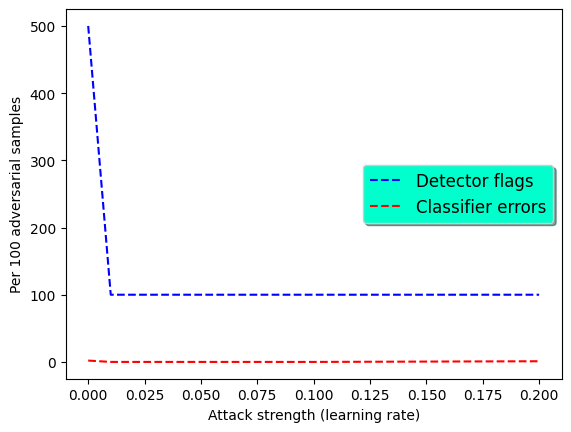

In [40]:
fig, ax = plt.subplots()
ax.plot(np.array(learning_range)[:8], np.array(nb_flag_adv)[:8], 'b--', label='Detector flags')
ax.plot(np.array(learning_range)[:8], np.array(nb_missclass)[:8], 'r--', label='Classifier errors')

legend = ax.legend(loc='center right', shadow=True, fontsize='large')
legend.get_frame().set_facecolor('#00FFCC')

plt.xlabel('Attack strength (learning rate)')
plt.ylabel('Per 100 adversarial samples')
plt.show()

Evaluate the adversarial generated data

### **Summary**


#### Zeroth-Order Optimization (ZOO) Attack and Binary Input Detector Using MNIST-10

This notebook demonstrates the implementation of the ZOO attack using the Adversarial Robustness Toolbox (ART) against deep learning models trained on the MNIST-10 dataset. The tasks covered include:

1. **Load the Required Libraries:** Import necessary Python libraries and modules, including TensorFlow/Keras and ART.
2. **Load the Dataset and Inspect the Data:** Load and visualize the MNIST-10 dataset of handwritten digits (0-9).
3. **Create a Deep Learning Model:** Construct a CNN to classify MNIST-10 digits, including convolutional, pooling, and fully connected layers.
4. **Train and Evaluate the Model:** Train the CNN on MNIST-10 and evaluate its baseline accuracy on test data.
5. **Implement ZOO Attack Using ART:** The Zeroth Order Optimization (ZOO) attack is notable for its effectiveness in black-box settings, where only the model's output is accessible.
6. **Create Adversarial Samples Using ZOO:** Generate adversarial examples from the test images using ZOO and visually inspect them.
7. **Evaluate Against Adversarial Samples:** Test the model's robustness by evaluating its accuracy on the adversarial samples.
8. **Create a Detector Model:** Develop a binary classifier to detect adversarial inputs by differentiating between original and adversarial images.
9. **Train and Evaluate the Detector:** Train the detector using a labeled dataset of original and adversarial samples, and evaluate its accuracy in identifying adversarial attacks.

This summary highlights the process and key tasks involved in implementing the ZOO attack and developing a binary input detector using the MNIST-10 dataset, illustrating the importance of adversarial defenses in machine learning.